# <span style="color:#9c8f8f"> 75.06/95.58 Organización de Datos</span>
# <span style="color:#9c8f8f"> Análisis exploratorio: Real or Not? NLP with Disaster Tweets</span>

# <center>FEATURE ENGINEERING</center>
# <center>Random Forest</center>

In [288]:
# Cargo librerias

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

# I) Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

# II) Auxiliary Functions

In [289]:
#Analisis de features y la importancia de c/u
def get_eficiencia_features_de (df, cantidad_arboles, profundidad_cada_arbol):
    # "desde_col" toma la columna desde la cual se van a evaluar los features
    # "hasta_col" toma la columna hasta la cual se van a evaluar los features
    # "on_col" toma la unica columna para la cual se van a calcular los features que van entre (desde_col,hasta_col)
    vector_aux = []
    on_col = 1
    desde_col = on_col + 1
    hasta_col = -1 
    #X,y = df.iloc[:,1:7] , df.iloc[:,1]
    X,y = df.iloc[:,desde_col:hasta_col] , df.iloc[:,on_col]
    X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state = 123)
    rf_model = RandomForestClassifier(random_state = 1, n_estimators = cantidad_arboles, max_depth = profundidad_cada_arbol)
    rf_model.fit(X_train,y_train)
    predicciones = rf_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,predicciones)) 
    feature_importances = rf_model.feature_importances_
    feature_estimators = rf_model.estimators_[0]
    vector_aux.append(X_train)
    vector_aux.append(rmse)
    vector_aux.append(feature_importances)
    vector_aux.append(feature_estimators)
    return vector_aux

In [290]:
#Plot de feature importance con RF
def bar_plot_feature_importance (X_train, feature_importance):
    plt.bar(X_train.columns, feature_importance)
    plt.xlabel ('features')
    plt.ylabel ('importancia')
    plt.title ('importancia features con RF')
    plt.rcParams["figure.figsize"] = (6,4)
    plt.xticks(rotation='vertical')
    plt.show()

In [291]:
#Plot de grafica de estimadores y diagrama de arbol
def bar_plot_feature_estimators (X_train, feature_estimators):
    plt.bar(X_train.columns, feature_estimators.feature_importances_)
    plt.xlabel('features')
    plt.ylabel('importancia')
    plt.title('importancia features del arbol')
    plt.xticks(rotation='vertical')
    plt.show
    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10), dpi = 200)
    tree.plot_tree(feature_estimators, feature_names = X_train.columns, filled = True)

In [292]:
#Standariza a cierto formato los csv input
def csv_to_df_standarized(doc_csv):
    df = pd.read_csv(doc_csv)
    df = df.drop(df.columns[0],axis=1)
    return df

In [293]:
#Toma todos los csv con features numericos y los procesa
def analisis_de_todos_los_features_numericos(docs):
    for doc in docs:
        df_actual = csv_to_df_standarized(doc)
        vectorcito_actual = get_eficiencia_features_de(df_actual,3,6)
        print('RMSE: %f' % vectorcito_actual[1])
        puntaje_ordenado_descendente = np.sort(vectorcito_actual[2])[::-1]
        print(puntaje_ordenado_descendente[:20])
        bar_plot_feature_importance(vectorcito_actual[0],puntaje_ordenado_descendente)
        #bar_plot_feature_importance(vectorcito_actual[0],vectorcito_actual[2])
        bar_plot_feature_estimators(vectorcito_actual[0],vectorcito_actual[3])

In [294]:
#Guarda los features mas importantes y los valores de feature_importance
def feature_importance_chart(X_train,feature_importance):
    featureImpList= []

    for feat, importance in zip(X_train.columns, feature_importance):  
        temp = [feat, importance*100]
        featureImpList.append(temp)

    fT_df = pd.DataFrame(featureImpList, columns = ['Feature', 'Importance'])
    final = fT_df.sort_values('Importance',ascending = False)
    return final

In [295]:
#Devuelve el numero de columna que representa el feature mas importante - de mayor a menor
def col_number_by_feature_importance_descending(feature_importance):
    important_features_dict = {}
    for x,i in enumerate(feature_importance):
        important_features_dict[x]=i


    important_features_list = sorted(important_features_dict,
                                     key=important_features_dict.get,
                                     reverse=True)
    resultado = ('Most important features: %s' %important_features_list)
    return resultado


In [490]:
def csv_final_test_and_train(importance_features_chart,cant_features,test_set, train_set):
    importance_features_chart = importance_features_chart.iloc[0:cant_features,]
    lista_columnas_elegidas = importance_features_chart['Feature'].to_list()
    lista_columnas_elegidas.append("id")
    termino = ['target']
    lista_columnas_elegidas_train = (lista_columnas_elegidas + termino)
    
    final_test = test_set[test_set.columns.intersection(lista_columnas_elegidas)]
    final_train = train_set[train_set.columns.intersection(lista_columnas_elegidas_train)]
    return (final_train, final_test)



# III) Random Forest - KEYWORDS

# 1) TRAIN SET

## a. Numerical


In [446]:
keywords_numerical_features_train = csv_to_df_standarized('keywords_numerical_features')
keywords_numerical_features_train.head()

,id,target,text_contains_keyword,has_keyword,keywords_quantity,keywords_mean,keyword_is_hashtag,keyword_frequency
0,1,1,1,1,1,0.004525,1,0.227027
1,4,1,1,1,1,0.004525,0,0.237838
2,5,1,1,1,1,0.004525,0,0.210811
3,6,1,1,1,1,0.004525,0,0.210811
4,7,1,1,1,1,0.004525,0,0.237838


In [447]:
#def get_eficiencia_features_de (df, cantidad_arboles, profundidad_cada_arbol)
#El vector guarda los siguientes elementos: X_train, RMSE, feature_importance, feature_estimators
#Los valores para "cantidad_arboles"=4 y "profundidad_cada_arbol"=4 son los optimos
vector_keywords_train = get_eficiencia_features_de(keywords_numerical_features_train,4,4)

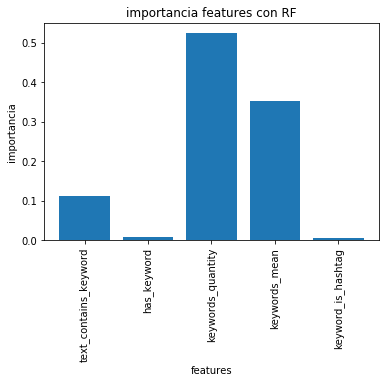

In [448]:
#Plot de feature importance con RF   // def bar_plot_feature_importance (X_train, feature_importance):
bar_plot_feature_importance(vector_keywords_train[0],vector_keywords_train[2])

In [449]:
keywords_numerical_feature_importance = feature_importance_chart(vector_keywords_train[0],vector_keywords_train[2])
keywords_numerical_feature_importance.head()

,Feature,Importance
2,keywords_quantity,52.421812
3,keywords_mean,35.136856
0,text_contains_keyword,11.135373
1,has_keyword,0.801714
4,keyword_is_hashtag,0.504244


## b. Categorical

In [450]:
keywords_categorical_features_encoded_train = csv_to_df_standarized('keywords_categorical_features_encoded_train')
keywords_categorical_features_encoded_train.head()

,id,target,K_ablaze,K_accident,K_aftershock,K_airplane accident,K_ambulance,K_annihilate,K_annihilation,K_apocalypse,...,K_volcano,K_war zone,K_weapon,K_whirlwind,K_wild fire,K_wildfire,K_windstorm,K_wound,K_wreck,K_wreckage
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [451]:
#Los valores para "cantidad_arboles"=20 y "profundidad_cada_arbol"=30 son los optimos
vector_keywords_categorical_train = get_eficiencia_features_de(keywords_categorical_features_encoded_train,20,30)

In [452]:
keywords_categorical_features_importance_chart = feature_importance_chart(vector_keywords_categorical_train[0],vector_keywords_categorical_train[2])
keywords_categorical_features_importance_chart.head()

,Feature,Importance
85,K_fire,7.074928
26,K_bomb,5.671447
150,K_storm,4.957669
179,K_wildfire,3.328322
130,K_police,3.288915


In [453]:
keywords_categorical_features_importance_chart.describe()

,Importance
count,183.000000
mean,0.546448
std,0.962695
min,0.000000
25%,0.071586
50%,0.206128
75%,0.534049
max,7.074928


## c. Categorical and Numerical

In [454]:
keywords_categorical_and_numerical = pd.merge (keywords_categorical_features_encoded_train,keywords_numerical_features_train, on = ['id','target'])
keywords_categorical_and_numerical.head()

,id,target,K_ablaze,K_accident,K_aftershock,K_airplane accident,K_ambulance,K_annihilate,K_annihilation,K_apocalypse,...,K_windstorm,K_wound,K_wreck,K_wreckage,text_contains_keyword,has_keyword,keywords_quantity,keywords_mean,keyword_is_hashtag,keyword_frequency
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0.004525,1,0.227027
1,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0.004525,0,0.237838
2,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0.004525,0,0.210811
3,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0.004525,0,0.210811
4,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0.004525,0,0.237838


In [455]:
vector_keywords_categorical_numerical = get_eficiencia_features_de(keywords_categorical_and_numerical,19,150)

In [456]:
keywords_categorical_numerical_importance_chart = feature_importance_chart(vector_keywords_categorical_numerical[0],vector_keywords_categorical_numerical[2])
keywords_categorical_numerical_importance_chart.head(100)

,Feature,Importance
187,keywords_mean,7.477204
186,keywords_quantity,6.482915
85,K_fire,3.920630
184,text_contains_keyword,2.608634
26,K_bomb,2.517968
...,...,...
72,K_emergency plan,0.316103
67,K_drown,0.314960
156,K_survive,0.313411
15,K_bioterror,0.313233


In [457]:
keywords_categorical_numerical_importance_chart.describe()

,Importance
count,189.000000
mean,0.529101
std,0.830220
min,0.015127
25%,0.162172
50%,0.317984
75%,0.573232
max,7.477204


In [458]:
#keywords_categorical_numerical = keywords_categorical_numerical_importance_chart.iloc[0:100,]
#lista_columnas_elegidas = keywords_categorical_numerical['Feature'].to_list()
#lista_columnas_elegidas.append("id")

In [459]:
#termino = ['target']
#lista_columnas_elegidas_train = lista_columnas_elegidas + termino

# 2) TEST SET

In [460]:
keywords_numerical_features_test = csv_to_df_standarized('keywords_numerical_features_test')
keywords_numerical_features_test.head()

,id,text_contains_keyword,has_keyword,keywords_quantity,keywords_mean,keyword_is_hashtag,keyword_frequency
0,0,1,1,1,0.004525,0,0.183784
1,2,1,1,1,0.004525,1,0.075676
2,3,1,1,1,0.004525,0,0.075676
3,9,1,1,1,0.004525,0,0.102703
4,11,1,1,1,0.004525,0,0.070270


In [469]:
keywords_categorical_features_test = csv_to_df_standarized('test_categorical_keywords_encoded')
keywords_categorical_features_test.head()

,id,K_ablaze,K_accident,K_aftershock,K_airplane accident,K_ambulance,K_annihilate,K_annihilation,K_apocalypse,K_armageddon,...,K_volcano,K_war zone,K_weapon,K_whirlwind,K_wild fire,K_wildfire,K_windstorm,K_wound,K_wreck,K_wreckage
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [470]:
keywords_categorical_and_numerical_test = pd.merge(keywords_numerical_features_test,keywords_categorical_features_test, on='id')
keywords_categorical_and_numerical_test.head()

,id,text_contains_keyword,has_keyword,keywords_quantity,keywords_mean,keyword_is_hashtag,keyword_frequency,K_ablaze,K_accident,K_aftershock,...,K_volcano,K_war zone,K_weapon,K_whirlwind,K_wild fire,K_wildfire,K_windstorm,K_wound,K_wreck,K_wreckage
0,0,1,1,1,0.004525,0,0.183784,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,0.004525,1,0.075676,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,0.004525,0,0.075676,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,1,1,1,0.004525,0,0.102703,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,11,1,1,1,0.004525,0,0.070270,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [491]:
# Se devuelven los dataframes train y test listos para ser exportados en formato csv
# los parametros son: importance_features_chart,cant_features,test_set, train_set
final_train, final_test = csv_final_test_and_train(keywords_categorical_numerical_importance_chart,100,keywords_categorical_and_numerical_test,keywords_categorical_and_numerical)

In [493]:
final_test

,id,text_contains_keyword,keywords_quantity,keywords_mean,keyword_is_hashtag,K_accident,K_apocalypse,K_armageddon,K_arson,K_attack,...,K_tragedy,K_typhoon,K_volcano,K_weapon,K_wild fire,K_wildfire,K_windstorm,K_wound,K_wreck,K_wreckage
0,0,1,1,0.004525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0.004525,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0.004525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,1,1,0.004525,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,11,1,1,0.004525,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,1,1,0.004525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3259,10865,1,3,0.013575,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3260,10868,1,1,0.004525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3261,10874,1,1,0.004525,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [472]:
# Test y train finales - mismos features
final_test.to_csv('final_test')
final_train.to_csv('final_train')

# III) Random Forest - TEXT

# 1) TRAIN SET

In [482]:
text_general_numerical_features_train = csv_to_df_standarized('text_general_numerical_features_train')
text_general_numerical_features_train

,id,target,#palabras,#palabras_unicas,#caracteres,#stopwords,#puntuacion,#capitalize,#mayusculas,#silabas,...,#caracteres_especiales,#palabras_binned,#palabras_unicas_binned,#caracteres_binned,#stopwords_binned,#puntuacion_binned,#capitalize_binned,#mayusculas_binned,#silabas_binned,#caracteres_especiales_binned
0,1,1,13,13,71,5,1,5,1,19,...,1,1,1,1,1,0,2,0,1,0
1,4,1,7,7,40,0,1,5,0,10,...,1,0,0,0,0,0,2,0,0,0
2,5,1,22,20,135,9,3,2,0,27,...,3,3,3,4,2,1,1,0,3,1
3,6,1,8,8,67,1,2,1,0,17,...,2,0,0,1,0,0,0,0,1,0
4,7,1,16,15,90,6,2,3,0,24,...,2,2,2,2,2,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,1,10,10,62,2,0,1,0,16,...,0,0,1,1,0,0,0,0,1,0
7609,10870,1,18,15,101,7,2,4,0,23,...,2,2,2,3,2,0,1,0,2,0
7610,10871,1,7,7,44,1,6,4,2,10,...,6,0,0,0,0,2,1,0,0,2
7611,10872,1,19,19,139,5,5,3,0,33,...,5,3,3,4,1,2,1,0,3,2


In [483]:
vector_text_features_train = get_eficiencia_features_de(text_general_numerical_features_train,44,30)

In [484]:
text_features_train_importance_chart = feature_importance_chart(vector_text_features_train[0],vector_text_features_train[2])
#text_features_train_importance_chart

In [485]:
text_features_train_importance_chart.describe()

,Importance
count,18.000000
mean,5.555556
std,4.625076
min,0.000000
25%,2.050797
50%,5.488368
75%,7.096246
max,17.741670


In [486]:
text_features_train_importance_chart.head(30)

,Feature,Importance
8,promedio_len_word,17.741670
2,#caracteres,12.480990
7,#silabas,11.264192
5,#capitalize,7.927917
3,#stopwords,7.337441
9,#caracteres_especiales,6.372659
4,#puntuacion,6.298124
0,#palabras,6.011939
1,#palabras_unicas,5.932391
6,#mayusculas,5.044345


In [440]:
#text_features_train_importance_chart = text_features_train_importance_chart.iloc[0:17,]
#lista_columnas_elegidas_text = text_features_train_importance_chart['Feature'].to_list()
#lista_columnas_elegidas_text.append('id')
#lista_columnas_elegidas_text

['promedio_len_word',
 '#caracteres',
 '#silabas',
 '#capitalize',
 '#stopwords',
 '#caracteres_especiales',
 '#puntuacion',
 '#palabras',
 '#palabras_unicas',
 '#mayusculas',
 '#capitalize_binned',
 '#silabas_binned',
 '#caracteres_binned',
 '#puntuacion_binned',
 '#stopwords_binned',
 '#palabras_unicas_binned',
 '#palabras_binned',
 'id']

# 2) TEST SET

In [487]:
text_general_numerical_features_test = csv_to_df_standarized('text_general_numerical_features_test')
text_general_numerical_features_test

,id,#palabras,#palabras_unicas,#caracteres,#stopwords,#puntuacion,#capitalize,#mayusculas,#silabas,promedio_len_word,#caracteres_especiales,#palabras_binned,#palabras_unicas_binned,#caracteres_binned,#stopwords_binned,#puntuacion_binned,#capitalize_binned,#mayusculas_binned,#silabas_binned,#caracteres_especiales_binned
0,0,6,6,36,1,0,1,0,7,4.833333,0,0,0,0,0,0,0,0,0,0
1,2,9,9,66,2,3,1,0,17,6.222222,3,0,0,1,0,1,0,0,1,1
2,3,19,19,98,8,2,1,1,17,4.105263,2,3,3,3,2,0,0,0,1,0
3,9,4,4,42,0,3,2,0,11,9.250000,3,0,0,0,0,1,1,0,0,1
4,11,8,8,47,2,0,4,0,15,4.750000,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,7,6,54,0,0,0,6,11,6.428571,0,0,0,0,0,0,0,0,0,0
3259,10865,23,22,141,4,5,5,2,34,5.086957,5,3,3,4,1,2,2,0,3,2
3260,10868,5,5,34,1,0,3,0,8,5.600000,0,0,0,0,0,0,1,0,0,0
3261,10874,6,6,44,0,2,3,2,13,6.166667,2,0,0,0,0,0,1,0,0,0


In [494]:
text_final_train, text_final_test = csv_final_test_and_train(text_features_train_importance_chart, 17, text_general_numerical_features_test,text_general_numerical_features_train)

In [496]:
text_final_train

,id,target,#palabras,#palabras_unicas,#caracteres,#stopwords,#puntuacion,#capitalize,#mayusculas,#silabas,promedio_len_word,#caracteres_especiales,#palabras_binned,#palabras_unicas_binned,#caracteres_binned,#stopwords_binned,#puntuacion_binned,#capitalize_binned,#silabas_binned
0,1,1,13,13,71,5,1,5,1,19,4.384615,1,1,1,1,1,0,2,1
1,4,1,7,7,40,0,1,5,0,10,4.571429,1,0,0,0,0,0,2,0
2,5,1,22,20,135,9,3,2,0,27,5.090909,3,3,3,4,2,1,1,3
3,6,1,8,8,67,1,2,1,0,17,7.125000,2,0,0,1,0,0,0,1
4,7,1,16,15,90,6,2,3,0,24,4.500000,2,2,2,2,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,1,10,10,62,2,0,1,0,16,5.100000,0,0,1,1,0,0,0,1
7609,10870,1,18,15,101,7,2,4,0,23,4.555556,2,2,2,3,2,0,1,2
7610,10871,1,7,7,44,1,6,4,2,10,5.142857,6,0,0,0,0,2,1,0
7611,10872,1,19,19,139,5,5,3,0,33,6.263158,5,3,3,4,1,2,1,3


In [497]:
# Test y train finales - mismos features
text_final_test.to_csv('text_final_test')
text_final_train.to_csv('text_final_train')